### EDA and Preproccessing

In [1]:
import rag_chatbot.data.filter as fl
import rag_chatbot.preprocessing.cleaning as cl
from rag_chatbot.core.settings import settings
from rag_chatbot.data.handler import DataHandler
import rag_chatbot.viz.plots as viz

In [2]:
COLS = settings.get('columns')
MAPPING_COLS=COLS["mapping"]
REQUIRED_COLS = COLS['required']
FILTERS = settings.get('filters')["allowed_product_categories"]
CAT_MAPPING = settings.get('filters')["product_category_mapping"]
REQUIRED_COLS = set(MAPPING_COLS.values())


### Load Complaints Data

In [3]:
df_raw = DataHandler.from_registry("DATA", "raw_dir", "complaints.csv").load()

D:\10Acadamy\Week 7\Tasks\rag-complaint-chatbot\src\rag_chatbot\data\handler.py:56: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(self.filepath, **self.kwargs)


EDA

In [4]:
df_raw.shape

(9609797, 18)

In [5]:
product_counts = df_raw["Product"].value_counts()
product_counts


Product
Credit reporting or other personal consumer reports                             4834855
Credit reporting, credit repair services, or other personal consumer reports    2163857
Debt collection                                                                  799197
Mortgage                                                                         422254
Checking or savings account                                                      291178
Credit card                                                                      226686
Credit card or prepaid card                                                      206369
Money transfer, virtual currency, or money service                               145066
Credit reporting                                                                 140429
Student loan                                                                     109717
Bank account or service                                                           86205
Vehicle loan or lease   

In [6]:
df_raw["narrative_length"] = (
    df_raw["Consumer complaint narrative"]
    .astype(str)
    .apply(lambda x: len(x.split()))
)

<Axes: >

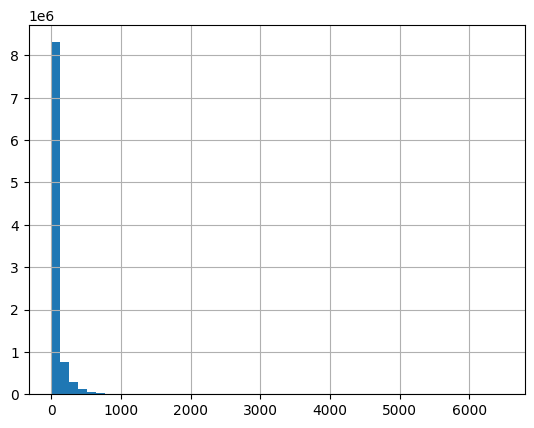

In [7]:
df_raw["narrative_length"].hist(bins=50)

In [8]:
with_narrative = df_raw["Consumer complaint narrative"].notna().sum()
without_narrative = df_raw["Consumer complaint narrative"].isna().sum()

with_narrative, without_narrative

(np.int64(2980756), np.int64(6629041))

In [9]:
print("\nMissing values (%):")
# print((df_raw.isna().mean() * 100).round(2))


Missing values (%):


In [10]:
print("\nSample rows:")
display(df_raw.head())


Sample rows:


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,narrative_length
0,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,FL,32092,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195687,1
1,2025-06-20,Debt collection,Telecommunications debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company can't verify or dispute the facts in t...,"Eastern Account Systems of Connecticut, Inc.",FL,342XX,NaN,NaN,Web,2025-06-20,Closed with explanation,Yes,NaN,14195688,1
2,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195689,1
3,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195690,1
4,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,IL,60628,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195692,1


In [11]:
print("\nData types:")
print(df_raw.dtypes)


Data types:
Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Consumer disputed?              object
Complaint ID                     int64
narrative_length                 int64
dtype: object


D:\10Acadamy\Week 7\Tasks\rag-complaint-chatbot\src\rag_chatbot\viz\plots.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_counts.index,


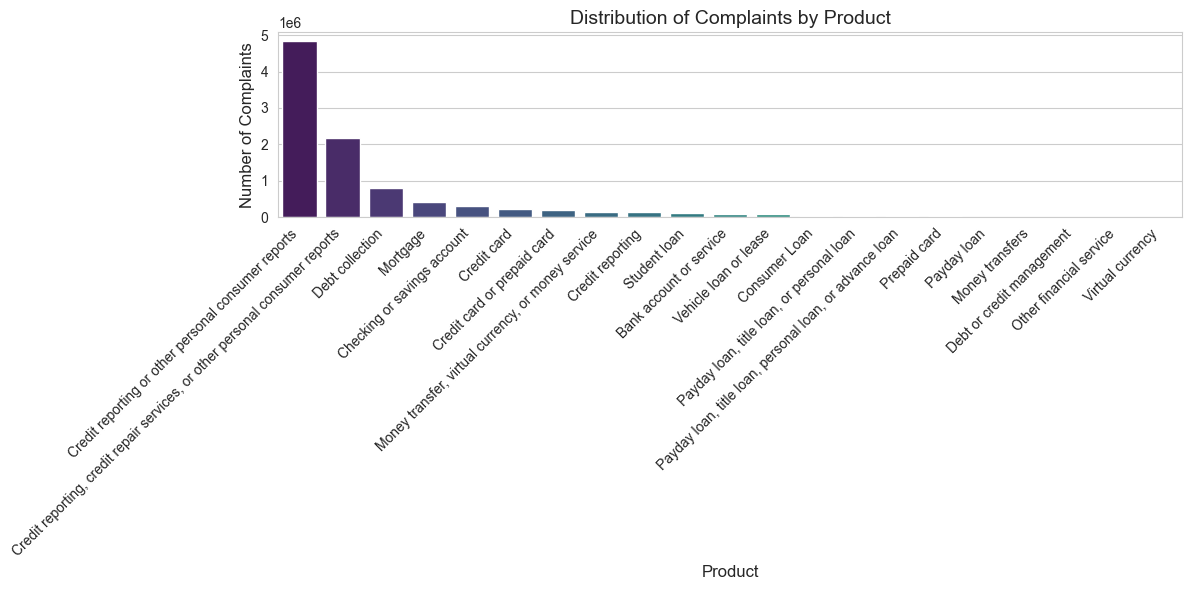

In [12]:
viz.plot_complaint_distribution(df_raw)

Cleaning and Saving Data

In [13]:
df = cl.clean_and_select_columns(
    df_raw,
    column_mapping=MAPPING_COLS,
    required_columns=REQUIRED_COLS,
)

In [14]:
df

,complaint_id,product_category,product,issue,sub_issue,consumer_complaint_narrative,company,state,date_received
0,14195687,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Experian Information Solutions Inc.,FL,2025-06-20
1,14195688,Debt collection,Telecommunications debt,Attempts to collect debt not owed,Debt is not yours,NaN,"Eastern Account Systems of Connecticut, Inc.",FL,2025-06-20
2,14195689,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,2025-06-20
3,14195690,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,Experian Information Solutions Inc.,AZ,2025-06-20
4,14195692,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,Experian Information Solutions Inc.,IL,2025-06-20
...,...,...,...,...,...,...,...,...,...
9609792,2102374,Credit reporting,NaN,Unable to get credit report/credit score,Problem getting my free annual report,NaN,"EQUIFAX, INC.",FL,2016-09-08
9609793,5637858,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,"EQUIFAX, INC.",CA,2022-06-06
9609794,2012835,Credit reporting,NaN,Unable to get credit report/credit score,Problem getting report or credit score,NaN,"EQUIFAX, INC.",NJ,2016-07-14
9609795,740118,Credit reporting,NaN,Improper use of my credit report,Report improperly shared by CRC,NaN,"EQUIFAX, INC.",NJ,2014-03-03


In [15]:
df = fl.normalize_and_filter_products(
    df,
    allowed_products=FILTERS,
    category_mapping=CAT_MAPPING,
    product_column="product_category"
)

df = fl.filter_non_empty_narratives(df)

In [16]:
df_clean = cl.apply_text_cleaning(df)

In [17]:
df_clean

,complaint_id,product_category,product,issue,sub_issue,consumer_complaint_narrative,company,state,date_received,clean_narrative
12532,14061897,Savings account,Checking account,Managing an account,Deposits and withdrawals,I made the mistake of using my wellsfargo debi...,WELLS FARGO & COMPANY,ID,2025-06-13,i made the mistake of using my wellsfargo debi...
14562,13960106,Savings account,Checking account,Managing an account,Problem accessing account,Got locked out of my account because I was try...,"CITIBANK, N.A.",MI,2025-06-08,got locked out of my account because i was try...
16239,13949860,Personal loan,Payday loan,Problem with the payoff process at the end of ...,NaN,under Idaho state law28-46-413. PAYDAY LOAN BU...,QC HOLDINGS INC,ID,2025-06-07,under idaho state law28-46-413. payday loan bu...
16433,13994850,Personal loan,Installment loan,Getting the loan,NaN,I attempted to open account was told my info w...,Kikoff Inc.,FL,2025-06-10,i attempted to open account was told my info w...
17030,13976941,Savings account,Checking account,Problem caused by your funds being low,Overdrafts and overdraft fees,I am in the process of applying for a mortgage...,WELLS FARGO & COMPANY,TX,2025-06-09,i am in the process of applying for a mortgage...
...,...,...,...,...,...,...,...,...,...,...
9609681,5638610,Money transfers,Domestic (US) money transfer,Confusing or missing disclosures,NaN,"I moved into XXXX XXXX XXXX XXXX, owned, and ...",Entrata Inc.,CA,2022-06-06,"i moved into <masked> <masked>, owned, and ope..."
9609687,5896172,Personal loan,Installment loan,Problem when making payments,NaN,Omni financial loan. Paid for by allotment,Siggi LLC,VA,2022-08-19,omni financial loan. paid for by allotment
9609704,5896060,Money transfers,International money transfer,Other transaction problem,NaN,"Hello, I'm an XXXX of XXXX XXXX company that ...","CITIBANK, N.A.",NaN,2022-08-19,"hello, i m an <masked> of <masked> company tha..."
9609735,6238646,Savings account,Savings account,Managing an account,Deposits and withdrawals,"I already have a case XXXX, but it should not ...",WELLS FARGO & COMPANY,OK,2022-11-23,"i already have a case <masked>, but it should ..."


In [18]:
mask = df_clean["consumer_complaint_narrative"].str.contains(
    "XX|XXXX",
    case=False,
    na=False
)

df_filtered = df_clean[mask]

In [21]:
df_filtered

,complaint_id,product_category,product,issue,sub_issue,consumer_complaint_narrative,company,state,date_received,clean_narrative
12532,14061897,Savings account,Checking account,Managing an account,Deposits and withdrawals,I made the mistake of using my wellsfargo debi...,WELLS FARGO & COMPANY,ID,2025-06-13,i made the mistake of using my wellsfargo debi...
14562,13960106,Savings account,Checking account,Managing an account,Problem accessing account,Got locked out of my account because I was try...,"CITIBANK, N.A.",MI,2025-06-08,got locked out of my account because i was try...
16239,13949860,Personal loan,Payday loan,Problem with the payoff process at the end of ...,NaN,under Idaho state law28-46-413. PAYDAY LOAN BU...,QC HOLDINGS INC,ID,2025-06-07,under idaho state law28-46-413. payday loan bu...
16433,13994850,Personal loan,Installment loan,Getting the loan,NaN,I attempted to open account was told my info w...,Kikoff Inc.,FL,2025-06-10,i attempted to open account was told my info w...
17030,13976941,Savings account,Checking account,Problem caused by your funds being low,Overdrafts and overdraft fees,I am in the process of applying for a mortgage...,WELLS FARGO & COMPANY,TX,2025-06-09,i am in the process of applying for a mortgage...
...,...,...,...,...,...,...,...,...,...,...
9609659,3608942,Credit card,General-purpose credit card or charge card,"Advertising and marketing, including promotion...",Didn't receive advertised or promotional terms,"Hello, I recently signed up for a new Citi Pre...","CITIBANK, N.A.",MN,2020-04-16,"hello, i recently signed up for a new citi pre..."
9609681,5638610,Money transfers,Domestic (US) money transfer,Confusing or missing disclosures,NaN,"I moved into XXXX XXXX XXXX XXXX, owned, and ...",Entrata Inc.,CA,2022-06-06,"i moved into <masked> <masked>, owned, and ope..."
9609704,5896060,Money transfers,International money transfer,Other transaction problem,NaN,"Hello, I'm an XXXX of XXXX XXXX company that ...","CITIBANK, N.A.",NaN,2022-08-19,"hello, i m an <masked> of <masked> company tha..."
9609735,6238646,Savings account,Savings account,Managing an account,Deposits and withdrawals,"I already have a case XXXX, but it should not ...",WELLS FARGO & COMPANY,OK,2022-11-23,"i already have a case <masked>, but it should ..."


In [19]:
DataHandler.from_registry(
    section="DATA",
    path_key="interim_dir",
    filename="complaints_clean.parquet"
).save(df_clean)
print("Cleaned Data is successfully save in parquet format")

Cleaned Data is successfully save in parquet format


D:\10Acadamy\Week 7\Tasks\rag-complaint-chatbot\src\rag_chatbot\viz\plots.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_counts.index,


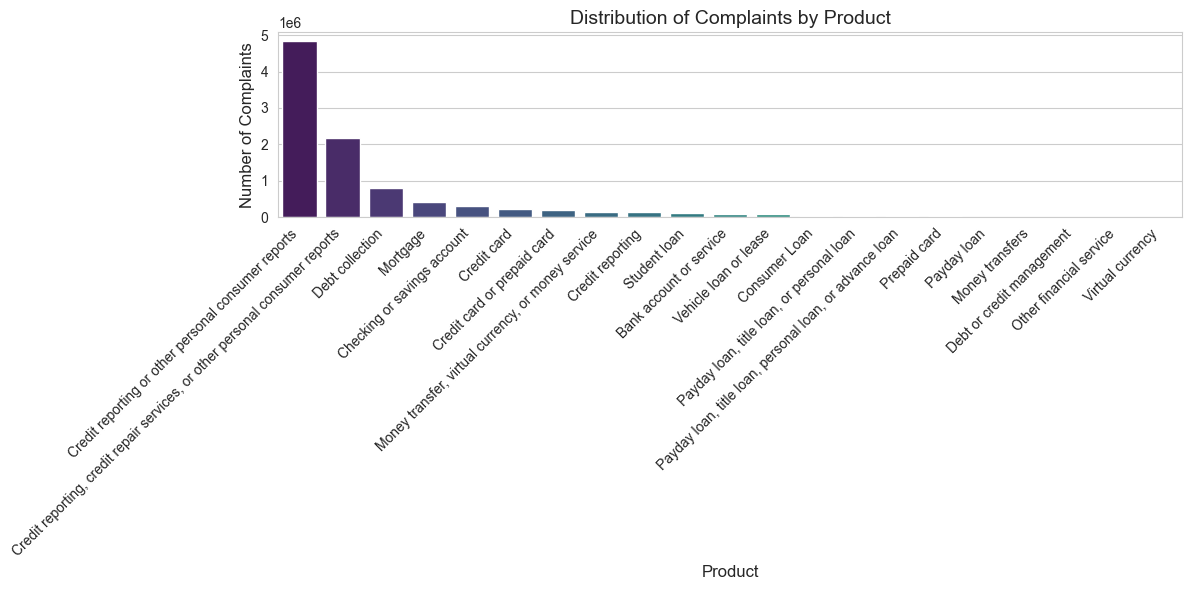

In [20]:
viz.plot_complaint_distribution(df_raw)